# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [62]:
df_main = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")

In [2]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [5]:
# copy the df for visualization 
df_vis = df.copy()

## Demystifying Variables Type

In [6]:
def grab_col_names(dataframe, categorical_threshold=10, cardinal_threshold=20, target=None):
    """
    It gives the names of categorical, numerical and categorical but cardinal,nominal variables in the data set.
    Note: Categorical variables but numerical variables are also included in categorical variables.

    Parameters
    ----------
    dataframe : dataframe
        The dataframe from which variables names are to be retrieved.
    categorical_threshold : int, optional
        class threshold for numeric but categorical variables
    cardinal_threshold : int, optional
        Class threshold for categorical but cardinal variables

    Returns
    -------
        categorical_cols : list
            Categorical variable list
        numerical_cols : list
            Numerical variable list
        cardinal_cols : list
            Categorical looking cardinal variable list

    Examples
    -------
        import seaborn as sns
        df = sns.load_titanic_dataset("iris")
        print(grab_col_names(df))

    Notes
    -------
        categorical_cols + numerical_cols + cardinal_cols = total number of variables.
        nominal_cols is inside categorical_cols
        The sum of the 3 returned lists equals the total number of variables: categorical_cols + cardinal_cols = number of variables

    """
    
    # Remove the target column from the dataset
    if target in dataframe.columns:
        dataframe = dataframe.drop(target, axis=1)
    

    categorical_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    nominal_cols = [col for col in dataframe.columns if
                    dataframe[col].nunique() < categorical_threshold and dataframe[col].dtypes != "O"]
    cardinal_cols = [col for col in dataframe.columns if
                     dataframe[col].nunique() > cardinal_threshold and dataframe[col].dtypes == "O"]
    categorical_cols = categorical_cols + nominal_cols
    categorical_cols = [col for col in categorical_cols if col not in cardinal_cols]

    # numerical_cols
    numerical_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    numerical_cols = [col for col in numerical_cols if col not in categorical_cols]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'categorical_cols: {len(categorical_cols)}')
    print(f'numerical_cols: {len(numerical_cols)}')
    print(f'cardinal_cols: {len(cardinal_cols)}')
    print(f'nominal_cols: {len(nominal_cols)}')
    return categorical_cols, numerical_cols, cardinal_cols, nominal_cols

In [7]:
target = "booking_complete"

In [8]:
# Değişken türlerin ayrıştırılması
categorical_cols, numerical_cols, cardinal_cols, nominal_cols = grab_col_names(df, categorical_threshold=5, cardinal_threshold=20, target=target)

Observations: 50000
Variables: 13
categorical_cols: 6
numerical_cols: 5
cardinal_cols: 2
nominal_cols: 3


In [9]:
print("Categorical column names: {}".format(categorical_cols))
print("\n")
print("Numerical column names: {}".format(numerical_cols))
print("\n")
print("Cardinal column names: {}".format(cardinal_cols))
print("\n")
print("Nominal column names: {}".format(nominal_cols))

Categorical column names: ['sales_channel', 'trip_type', 'flight_day', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']


Numerical column names: ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']


Cardinal column names: ['route', 'booking_origin']


Nominal column names: ['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']


### Data Structure Control (Float / String / Integer)

In [10]:
"""

Description:
-----------

Algorithm print out comprises missing ratios and unique values of each column i a given dataframe


R&D:
---

Add '#_infinity_' column to the dataframe

"""

def MissingUniqueStatistics(df):

  import io
  import pandas as pd
  import psutil, os, gc, time
  import seaborn as sns
  from IPython.display import display, HTML
  # pd.set_option('display.max_colwidth', -1)
  from io import BytesIO
  import base64

  print("MissingUniqueStatistics process has began:\n")
  proc = psutil.Process(os.getpid())
  gc.collect()
  mem_0 = proc.memory_info().rss
  start_time = time.time()

  # def createFigure(col):
  #     fig, ax = plt.subplots(figsize=(.4, .4))
  #     fig.subplots_adjust(0,0,1,1)
  #     ax.axis("off")
  #     ax.axis([0,1,0,1])
  #     print(col,df.loc[:,col].dtypes)

  #     if df.loc[:,col].dtype=="object":
  #       sns.catplot(data=df, x=col, kind="count")
  #     else:
  #       sns.distplot(df.loc[:,col], color="m")
  #     # c = plt.hist(df.loc[:,col])
  #     #ax.add_patch(c)
  #     return fig

  # # def fig2inlinehtml(fig):
  # #     figfile = BytesIO()
  # #     fig.savefig(figfile, format='png')
  # #     figfile.seek(0)
  # #     figdata_png = base64.b64encode(figfile.getvalue()).decode()
  # #     imgstr = '<img src="data:image/png;base64,{}" />'.format(figdata_png)
  # #     return imgstr

  # def mapping(col):
  #   fig = createFigure(col)
  #   fname = "./map_{}.png".format(col)
  #   fig.savefig(fname)
  #   imgstr = '<img src="{}" /> '.format(fname)
  #   return imgstr
  #   # fig = createFigure(col)
  #   # return fig2inlinehtml(fig)

  variable_name_list = []
  total_entry_list = []
  data_type_list = []
  unique_values_list = []
  number_of_unique_values_list = []
  missing_value_number_list = []
  missing_value_ratio_list = []
  mean_list=[]
  std_list=[]
  min_list=[]
  Q1_list=[]
  Q2_list=[]
  Q3_list=[]
  max_list=[]

  df_statistics = df.describe().copy()

  for col in df.columns:

    variable_name_list.append(col)
    total_entry_list.append(df.loc[:,col].shape[0])
    data_type_list.append(df.loc[:,col].dtype)
    unique_values_list.append(list(df.loc[:,col].unique()))
    number_of_unique_values_list.append(len(list(df.loc[:,col].unique())))
    missing_value_number_list.append(df.loc[:,col].isna().sum())
    missing_value_ratio_list.append(round((df.loc[:,col].isna().sum()/df.loc[:,col].shape[0]),4))

    try:
      mean_list.append(df_statistics.loc[:,col][1])
      std_list.append(df_statistics.loc[:,col][2])
      min_list.append(df_statistics.loc[:,col][3])
      Q1_list.append(df_statistics.loc[:,col][4])
      Q2_list.append(df_statistics.loc[:,col][5])
      Q3_list.append(df_statistics.loc[:,col][6])
      max_list.append(df_statistics.loc[:,col][7])
    except:
      mean_list.append('NaN')
      std_list.append('NaN')
      min_list.append('NaN')
      Q1_list.append('NaN')
      Q2_list.append('NaN')
      Q3_list.append('NaN')
      max_list.append('NaN')

  data_info_df = pd.DataFrame({'Variable': variable_name_list,
                               '#_Total_Entry':total_entry_list,
                               '#_Missing_Value': missing_value_number_list,
                               '%_Missing_Value':missing_value_ratio_list,
                               'Data_Type': data_type_list,
                               'Unique_Values': unique_values_list,
                               '#_Unique_Values':number_of_unique_values_list,
                               'Mean':mean_list,
                               'STD':std_list,
                               'Min':min_list,
                               'Q1':Q1_list,
                               'Q2':Q2_list,
                               'Q3':Q3_list,
                               'Max':max_list
                               })

  data_info_df = data_info_df.set_index("Variable", inplace=False)

  # data_info_df['pdf'] = np.nan
  # for col in data_info_df.index:
  #   data_info_df.loc[col,'pdf'] = mapping(col)

  print('MissingUniqueStatistics process has been completed!')
  print("--- in %s minutes ---" % ((time.time() - start_time)/60))

  return data_info_df.sort_values(by='%_Missing_Value', ascending=False)#, HTML(df.to_html(escape=False, formatters=dict(col=mapping)))

In [11]:
data_info = MissingUniqueStatistics(df)
# data_info = data_info.set_index("Variable")
data_info

MissingUniqueStatistics process has began:

MissingUniqueStatistics process has been completed!
--- in 0.0015420277913411459 minutes ---


C:\Users\Eda AYDIN\AppData\Local\Temp\ipykernel_37068\3919564226.py:93: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mean_list.append(df_statistics.loc[:,col][1])
C:\Users\Eda AYDIN\AppData\Local\Temp\ipykernel_37068\3919564226.py:94: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  std_list.append(df_statistics.loc[:,col][2])
C:\Users\Eda AYDIN\AppData\Local\Temp\ipykernel_37068\3919564226.py:95: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc

,#_Total_Entry,#_Missing_Value,%_Missing_Value,Data_Type,Unique_Values,#_Unique_Values,Mean,STD,Min,Q1,Q2,Q3,Max
Variable,,,,,,,,,,,,,
num_passengers,50000,0,0.0,int64,"[2, 1, 3, 4, 6, 5, 7, 9, 8]",9,1.59124,1.020165,1.0,1.0,1.0,2.0,9.0
sales_channel,50000,0,0.0,object,"[Internet, Mobile]",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trip_type,50000,0,0.0,object,"[RoundTrip, CircleTrip, OneWay]",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
purchase_lead,50000,0,0.0,int64,"[262, 112, 243, 96, 68, 3, 201, 238, 80, 378, ...",470,84.94048,90.451378,0.0,21.0,51.0,115.0,867.0
length_of_stay,50000,0,0.0,int64,"[19, 20, 22, 31, 48, 33, 30, 25, 43, 24, 17, 3...",335,23.04456,33.88767,0.0,5.0,17.0,28.0,778.0
flight_hour,50000,0,0.0,int64,"[7, 3, 17, 4, 15, 20, 6, 14, 12, 2, 19, 10, 8,...",24,9.06634,5.41266,0.0,5.0,9.0,13.0,23.0
flight_day,50000,0,0.0,object,"[Sat, Wed, Thu, Mon, Sun, Tue, Fri]",7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
route,50000,0,0.0,object,"[AKLDEL, AKLHGH, AKLHND, AKLICN, AKLKIX, AKLKT...",799,NaN,NaN,NaN,NaN,NaN,NaN,NaN
booking_origin,50000,0,0.0,object,"[New Zealand, India, United Kingdom, China, So...",104,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Building the Target Variable (Classification)

In [12]:
%matplotlib inline
# Histogram of the target categories
from matplotlib import ticker


def histogram(df,feature):
    #df = input("Enter a DataFrame name: ")
    #col = input("Enter a target column name: ")
    #df=eval(df)
    ncount = len(df)
    ax = sns.countplot(x = feature, data=df ,palette="hls")
    sns.set(font_scale=1)
    ax.set_xlabel('Target Segments')
    plt.xticks(rotation=90)
    ax.set_ylabel('Number of Observations')
    fig = plt.gcf()
    fig.set_size_inches(12,5)
    # Make twin axis
    ax2=ax.twinx()
    # Switch so count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()
    # Also switch the labels over
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    ax2.set_ylabel('Frequency [%]')
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y),
                ha='center', va='bottom') # set the alignment of the text
    # Use a LinearLocator to ensure the correct number of ticks
    ax.yaxis.set_major_locator(ticker.LinearLocator(11))
    # Fix the frequency range to 0-100
    ax2.set_ylim(0,100)
    ax.set_ylim(0,ncount)
    # And use a MultipleLocator to ensure a tick spacing of 10
    ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))
    # Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
    ax2.grid(None)
    plt.title('Histogram of Binary Target Categories', fontsize=20, y=1.08)
    plt.show()
    #plt.savefig('col.png')
    del ncount, x, y

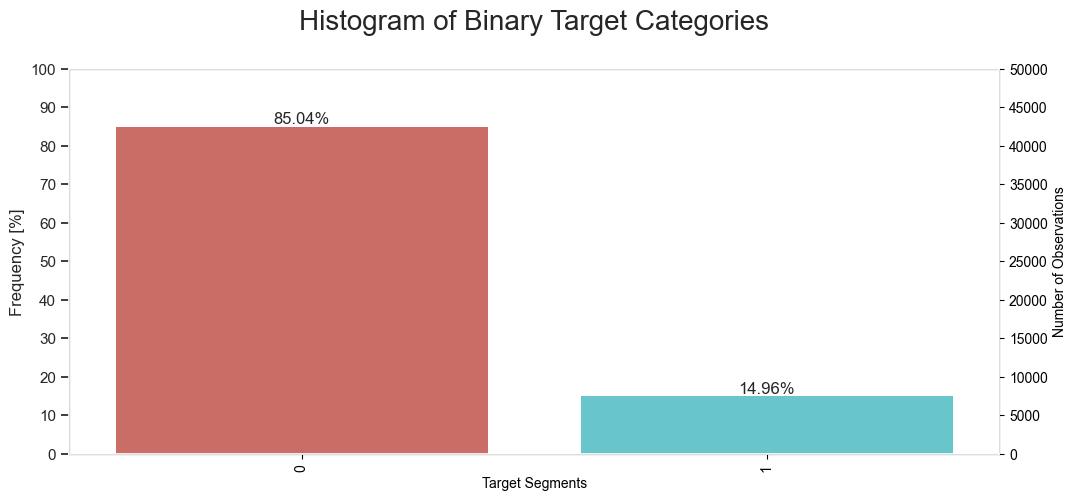

In [13]:
target= "booking_complete"

histogram(df,target)

## Preparatory Data Analysis

In [14]:
# Outlier Handling

def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquartile_range = quartile3 - quartile1
    up_limit = quartile3 + (1.5 * interquartile_range)
    low_limit = quartile1 - (1.5 * interquartile_range)
    return low_limit, up_limit

In [15]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [16]:
for col in numerical_cols:
    print(col, check_outlier(df, col))

num_passengers True
purchase_lead True
length_of_stay True
flight_hour False
flight_duration False


In [17]:
# Accessing Outliers

def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)
    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index

In [18]:
for col in numerical_cols:
  grab_outliers(df,col,True)

     num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
12                4      Internet  RoundTrip            265              24   
37                6      Internet  RoundTrip             20              22   
61                4      Internet  RoundTrip            128              21   
63                4      Internet  RoundTrip            311              27   
118               6      Internet  RoundTrip            172              28   

     flight_hour flight_day   route booking_origin  wants_extra_baggage  \
12            19        Mon  AKLDEL    New Zealand                    1   
37             3        Fri  AKLICN    South Korea                    1   
61             9        Mon  AKLICN    New Zealand                    1   
63             6        Sat  AKLICN    New Zealand                    0   
118            0        Sat  AKLKUL    New Zealand                    0   

     wants_preferred_seat  wants_in_flight_meals  flight_duration  \
12   

In [19]:
# Solving the Outlier problem

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [20]:
for col in numerical_cols:
    replace_with_thresholds(df, col)

C:\Users\Eda AYDIN\AppData\Local\Temp\ipykernel_37068\1724325246.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
C:\Users\Eda AYDIN\AppData\Local\Temp\ipykernel_37068\1724325246.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-29.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit


In [21]:
for col in numerical_cols:
    print(col, check_outlier(df, col))

num_passengers False
purchase_lead False
length_of_stay False
flight_hour False
flight_duration False


In [22]:
# Missing Data Handling

def missing_values_table(dataframe, na_name=False):

    # Column Names with Missing Values
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    # Number of Missing Values of One Column
    number_of_missing_values = dataframe[na_columns].isnull().sum().sort_values(ascending=False)

    # Percentage Distribution of Missing Data
    percentage_ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)

    # Dataframe with Missing Data
    missing_df = pd.concat([number_of_missing_values, np.round(percentage_ratio, 2)], axis=1, keys=['number_of_missing_values', 'percentage_ratio'])

    print(missing_df, end="\n")

    if na_name:
        return na_columns

In [23]:
missing_values_table(df)

Empty DataFrame
Columns: [number_of_missing_values, percentage_ratio]
Index: []


## Exploratory Data Analysis

In [24]:
def cat_summary(dataframe, col_name, plot=False,savefig=False):
    """
    It gives summary of categorical columns with a plot.

    Args:
        dataframe (dataframe): The dataframe from which variables names are to be retrieved.
        col_name (string): The column names from which features names are to be retrieved
        plot (bool, optional): Plot the figure of the specified column. Defaults to False.
        savefig(bool, optional): Save the figure of the specific column to the folder. Defaults to False
    """
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("########################################## \n")

    if plot:
        ax = sns.countplot(x=dataframe[col_name], data=dataframe,
                           order = df[col_name].value_counts().index)

        ncount = len(dataframe)
        sns.set(font_scale = 1)

        for p in ax.patches:
            x = p.get_bbox().get_points()[:, 0]
            y = p.get_bbox().get_points()[1, 1]
            ax.annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y),ha='center', va='bottom')  # set the alignment of the text

        # Use a LinearLocator to ensure the correct number of ticks
        ax.yaxis.set_major_locator(ticker.LinearLocator(11))

        plt.xticks(rotation=45)
        plt.title("{} Count Graph.png".format(col_name.capitalize()))
        if savefig:
            plt.savefig("{} Count Graph.png".format(col_name.capitalize()))
        plt.show(block=True)

In [25]:
df_vis["trip_type"].value_counts()

trip_type
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: count, dtype: int64

               sales_channel   Ratio
sales_channel                       
Internet               44382  88.764
Mobile                  5618  11.236
########################################## 



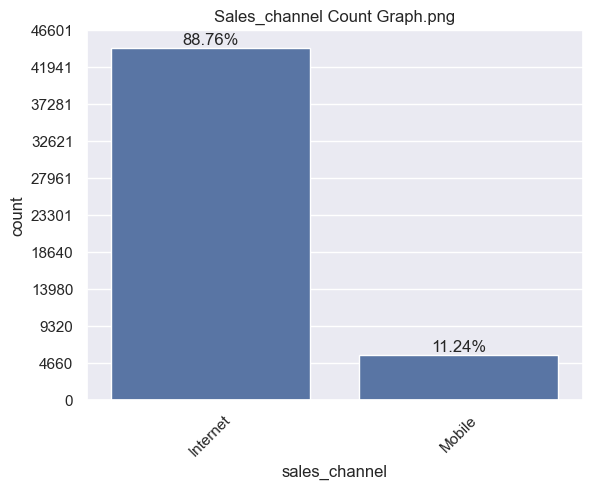

            trip_type   Ratio
trip_type                    
RoundTrip       49497  98.994
OneWay            387   0.774
CircleTrip        116   0.232
########################################## 



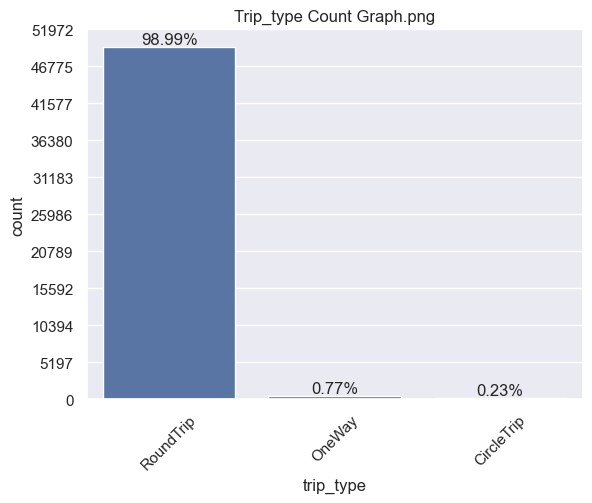

            flight_day   Ratio
flight_day                    
Mon               8102  16.204
Wed               7674  15.348
Tue               7673  15.346
Thu               7424  14.848
Fri               6761  13.522
Sun               6554  13.108
Sat               5812  11.624
########################################## 



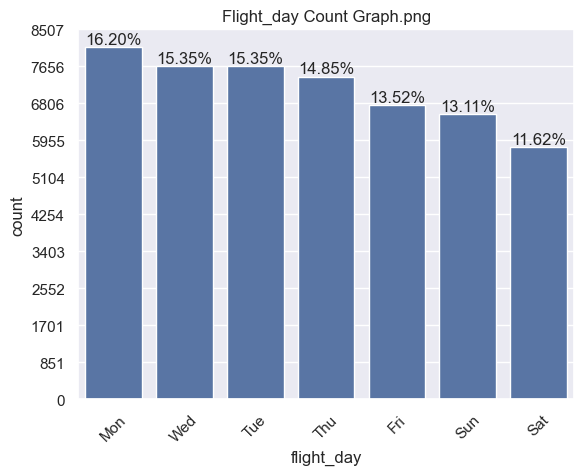

                     wants_extra_baggage   Ratio
wants_extra_baggage                             
1                                  33439  66.878
0                                  16561  33.122
########################################## 



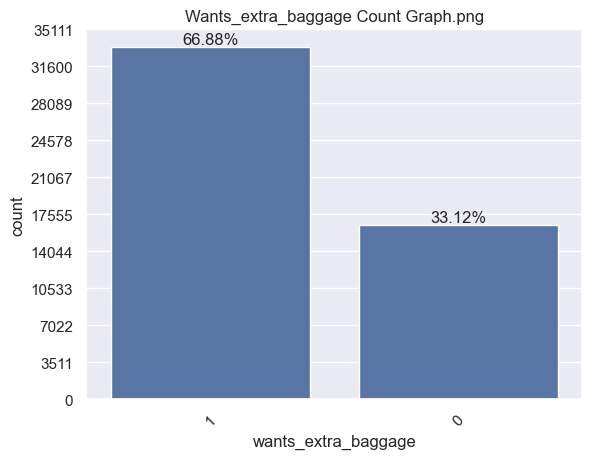

                      wants_preferred_seat   Ratio
wants_preferred_seat                              
0                                    35152  70.304
1                                    14848  29.696
########################################## 



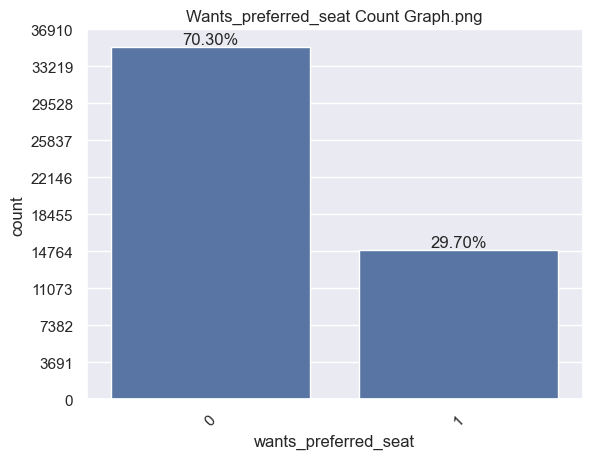

                       wants_in_flight_meals   Ratio
wants_in_flight_meals                               
0                                      28643  57.286
1                                      21357  42.714
########################################## 



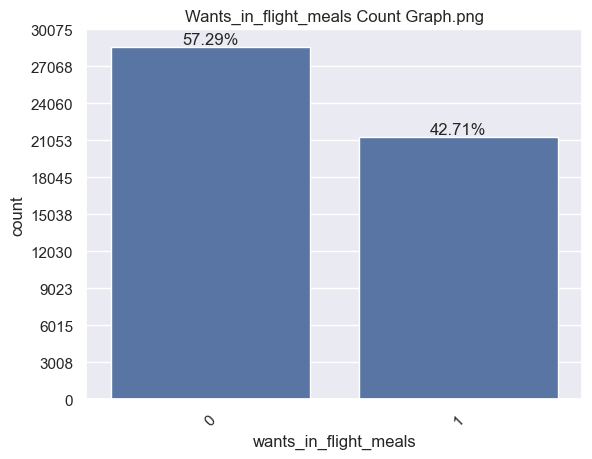

In [26]:
# Kategorik değişkenlerin incelenmesi

for col in categorical_cols:
    cat_summary(df_vis, col, plot=True, savefig=False)

In [27]:
def target_summary_with_categorical_data(dataframe, target, categorical_col):
    """
    It gives the summary of specified categorical column name according to target column.

    Args:
        dataframe (dataframe): The dataframe from which variables names are to be retrieved.
        target (string): The target column name are to be retrieved.
        categorical_col (string): The categorical column names are to be retrieved.
    """
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")

In [28]:
for col in categorical_cols:
    target_summary_with_categorical_data(dataframe=df, target = target, categorical_col=col)

               TARGET_MEAN
sales_channel             
Internet          0.154770
Mobile            0.108402


            TARGET_MEAN
trip_type              
CircleTrip     0.043103
OneWay         0.051680
RoundTrip      0.150575


            TARGET_MEAN
flight_day             
Fri            0.145393
Mon            0.148605
Sat            0.148142
Sun            0.141440
Thu            0.151131
Tue            0.147139
Wed            0.163148


                     TARGET_MEAN
wants_extra_baggage             
0                       0.115029
1                       0.166662


                      TARGET_MEAN
wants_preferred_seat             
0                        0.137944
1                        0.177061


                       TARGET_MEAN
wants_in_flight_meals             
0                         0.141396
1                         0.160509




Below is a brief analysis of the provided TARGET_MEAN values:

• For sales_channel, Internet bookings have a higher completion rate (≈15.5%) compared to Mobile (≈10.8%), suggesting that Internet bookings may be more effective or trusted.

• For trip_type, RoundTrip bookings show the highest completion rate (≈15.1%), while CircleTrip (≈4.3%) and OneWay (≈5.2%) are much lower. This could indicate that customers planning round trips are more likely to finalize their bookings.

• For flight_day, the completion rate is relatively consistent across the days of the week, ranging from ≈12.5% to ≈14.5%. This suggests that the day of the week may not have a significant impact on booking completion.

• For the extra services:
    - Customers requesting extra baggage (1) have a higher TARGET_MEAN (≈16.7%) compared to those not requesting it (≈11.5%).
    - For preferred seat requests, the completion percentage is slightly higher for those who request it (≈17.7% vs. ≈13.8%).
    - A similar trend appears with in-flight meals (≈16.1% vs. ≈14.1%).

• Finally, the target variable itself is binary, with 0 and 1 having TARGET_MEAN of 0 and 1, respectively, which serves as a sanity check.

Overall, it appears that certain booking channels and customer choices (especially round trip, extra service requests) are associated with a higher likelihood of booking completion.

In [29]:
def num_summary(dataframe, col_name, plot=False, savefig=False):
    """
    It gives the summary of numerical columns with a plot.

    Args:
        dataframe (dataframe): The dataframe from which variables names are to be retrieved.
        col_name (string): The column names from which features names are to be retrieved
        plot (bool, optional): Plot the figure of the specified column. Defaults to False.
        savefig(bool, optional): Save the figure of the specific column to the folder. Defaults to False

    """
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[col_name].describe(quantiles).T)

    if plot:
        dataframe[col_name].hist()
        plt.xlabel(col_name)
        plt.title("{} Histogram Graph.png".format(col_name.capitalize()))
        if savefig:
            plt.savefig("{} Histogram Graph.png".format(col_name.capitalize()))
        plt.show(block=True)

count    50000.000000
mean         1.518870
std          0.764866
min          1.000000
5%           1.000000
10%          1.000000
20%          1.000000
30%          1.000000
40%          1.000000
50%          1.000000
60%          1.000000
70%          2.000000
80%          2.000000
90%          3.000000
95%          3.500000
99%          3.500000
max          3.500000
Name: num_passengers, dtype: float64


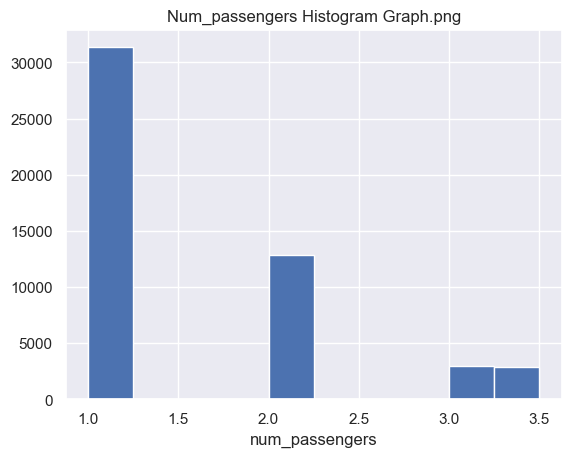

count    50000.000000
mean        79.978080
std         76.829501
min          0.000000
5%           4.000000
10%          8.000000
20%         17.000000
30%         26.000000
40%         38.000000
50%         51.000000
60%         70.000000
70%         96.000000
80%        141.000000
90%        224.000000
95%        256.000000
99%        256.000000
max        256.000000
Name: purchase_lead, dtype: float64


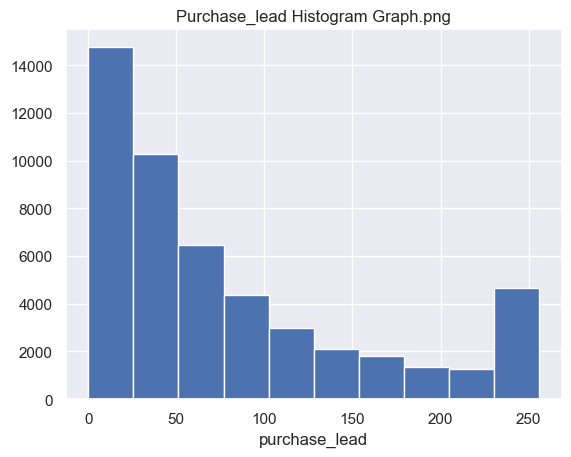

count    50000.000000
mean        19.343330
std         18.321769
min          0.000000
5%           3.000000
10%          4.000000
20%          5.000000
30%          5.000000
40%          6.000000
50%         17.000000
60%         20.000000
70%         25.000000
80%         31.000000
90%         53.000000
95%         62.500000
99%         62.500000
max         62.500000
Name: length_of_stay, dtype: float64


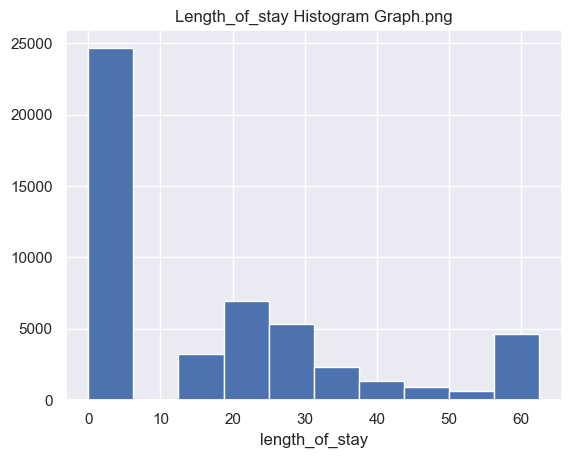

count    50000.00000
mean         9.06634
std          5.41266
min          0.00000
5%           1.00000
10%          2.00000
20%          4.00000
30%          6.00000
40%          7.00000
50%          9.00000
60%         10.00000
70%         12.00000
80%         14.00000
90%         16.00000
95%         19.00000
99%         23.00000
max         23.00000
Name: flight_hour, dtype: float64


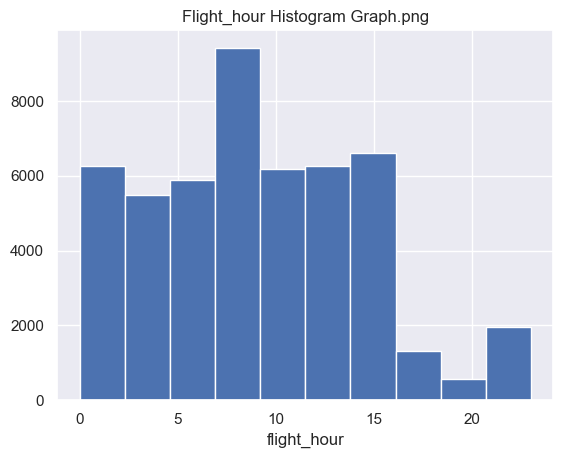

count    50000.000000
mean         7.277561
std          1.496863
min          4.670000
5%           4.670000
10%          5.070000
20%          5.620000
30%          6.420000
40%          6.620000
50%          7.570000
60%          8.580000
70%          8.670000
80%          8.830000
90%          8.830000
95%          8.830000
99%          8.830000
max          9.500000
Name: flight_duration, dtype: float64


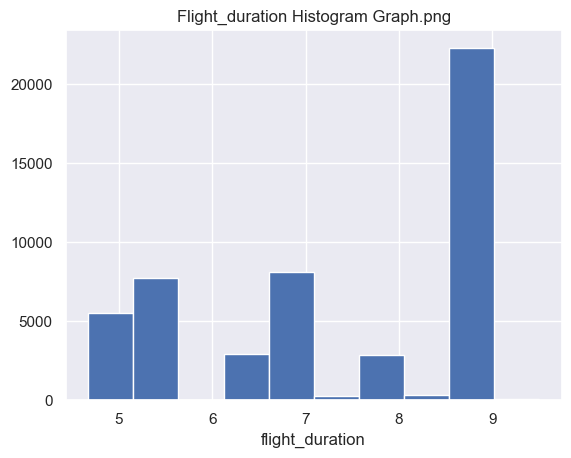

In [30]:
for col in numerical_cols:
    num_summary(df, col, True)

In [31]:
def target_summary_with_numerical_data(dataframe, target, numerical_col):
    """
    It gives the summary of specified numerical column name according to target column.

    Args:
        dataframe (dataframe): The dataframe from which variables names are to be retrieved.
        target (string): The target column name are to be retrieved.
        numerical_col (string): The numerical column names are to be retrieved.
    """
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

In [32]:
for col in numerical_cols:
    target_summary_with_numerical_data(df, target ,col)

                  num_passengers
booking_complete                
0                       1.510512
1                       1.566395


                  purchase_lead
booking_complete               
0                     80.767556
1                     75.488901


                  length_of_stay
booking_complete                
0                      19.898688
1                      16.185411


                  flight_hour
booking_complete             
0                    9.050162
1                    9.158331


                  flight_duration
booking_complete                 
0                        7.344266
1                        6.898258




It appears that customers who complete their bookings (booking_complete = 1) differ slightly in several numerical features compared to those who do not (booking_complete = 0):

• For num_passengers, the average is marginally higher (≈1.65 vs. ≈1.58), indicating that successful bookings tend to have slightly more passengers.

• In purchase_lead, the average for completed bookings is lower (≈80.17 days vs. ≈85.78 days), which may suggest that customers who book closer to the travel date are more likely to complete their booking.

• For length_of_stay, completed bookings show a shorter average duration (≈19.62 days vs. ≈23.65 days), implying shorter trips might be associated with higher booking completion.

• Flight_hour averages are very similar with a slight increase for completed bookings, which might not be practically significant.

• Lastly, flight_duration is shorter for completed bookings (≈6.90 hours vs. ≈7.34 hours), possibly indicating that shorter flights encourage booking finalization.

These differences, while relatively small, could be useful when selecting variables or thresholds during feature engineering for the predictive model.

## Feature Engineering

In [33]:
# Chi-Square Test for nominal_cols

nominal_cols

['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']

In [34]:
def chi2_by_hand(df, col1, col2):
    #---create the contingency table---
    df_cont = pd.crosstab(index = df[col1], columns = df[col2])
    display(df_cont)
    #---calculate degree of freedom---
    degree_f = (df_cont.shape[0]-1) * (df_cont.shape[1]-1)
    #---sum up the totals for row and columns---
    df_cont.loc[:,'Total']= df_cont.sum(axis=1)
    df_cont.loc['Total']= df_cont.sum()

    #---create the expected value dataframe---
    df_exp = df_cont.copy()
    df_exp.iloc[:,:] = np.multiply.outer(
        df_cont.sum(1).values,df_cont.sum().values) / df_cont.sum().sum()

    # calculate chi-square values
    df_chi2 = ((df_cont - df_exp)**2) / df_exp
    df_chi2.loc[:,'Total']= df_chi2.sum(axis=1)
    df_chi2.loc['Total']= df_chi2.sum()

    #---get chi-square score---
    chi_square_score = df_chi2.iloc[:-1,:-1].sum().sum()

    #---calculate the p-value---
    from scipy import stats
    p = stats.distributions.chi2.sf(chi_square_score, degree_f)

    return chi_square_score, degree_f, p

In [35]:
for col in nominal_cols:
    chi_score, degree_f, p = chi2_by_hand(df,col,target)
    print(f'Chi2_score: {chi_score}, Degrees of freedom: {degree_f}, p-value: {p}')

booking_complete,0,1
wants_extra_baggage,,
0,14656,1905
1,27866,5573


Chi2_score: 232.14282763583805, Degrees of freedom: 1, p-value: 2.0325293382292343e-52


C:\Users\Eda AYDIN\AppData\Local\Temp\ipykernel_37068\2650072158.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[14084.13684 28437.86316 42522.     ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_exp.iloc[:,:] = np.multiply.outer(
C:\Users\Eda AYDIN\AppData\Local\Temp\ipykernel_37068\2650072158.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[2476.86316 5001.13684 7478.     ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_exp.iloc[:,:] = np.multiply.outer(


booking_complete,0,1
wants_preferred_seat,,
0,30303,4849
1,12219,2629


Chi2_score: 125.58046440101637, Degrees of freedom: 1, p-value: 3.7987056771490804e-29


C:\Users\Eda AYDIN\AppData\Local\Temp\ipykernel_37068\2650072158.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[29894.66688 12627.33312 42522.     ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_exp.iloc[:,:] = np.multiply.outer(
C:\Users\Eda AYDIN\AppData\Local\Temp\ipykernel_37068\2650072158.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[5257.33312 2220.66688 7478.     ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_exp.iloc[:,:] = np.multiply.outer(


booking_complete,0,1
wants_in_flight_meals,,
0,24593,4050
1,17929,3428


Chi2_score: 35.14115415172873, Degrees of freedom: 1, p-value: 3.0665119847853264e-09


C:\Users\Eda AYDIN\AppData\Local\Temp\ipykernel_37068\2650072158.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[24359.15292 18162.84708 42522.     ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_exp.iloc[:,:] = np.multiply.outer(
C:\Users\Eda AYDIN\AppData\Local\Temp\ipykernel_37068\2650072158.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[4283.84708 3194.15292 7478.     ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_exp.iloc[:,:] = np.multiply.outer(


In [36]:
# The above contingency tables and Chi-Square tests assess the association between extra service features 
# (wants_extra_baggage, wants_preferred_seat, wants_in_flight_meals) and the target variable booking_complete.
#
# Analysis:
#
# 1. wants_extra_baggage:
#    - Table:
#          booking_complete    0      1
#          0              14656   1905
#          1              27866   5573
#    - Chi-square = 232.14, df = 1, p-value ≈ 2.03e-52.
#    - Interpretation: The extremely significant p-value indicates a very strong association between 
#      extra baggage requests and booking completion.
#
# 2. wants_preferred_seat:
#    - Table:
#          booking_complete    0      1
#          0              30303   4849
#          1              12219   2629
#    - Chi-square = 125.58, df = 1, p-value ≈ 3.80e-29.
#    - Interpretation: This result also suggests a strong relationship between preferred seat requests 
#      and the completion of bookings.
#
# 3. wants_in_flight_meals:
#    - Table:
#          booking_complete    0      1
#          0              24593   4050
#          1              17929   3428
#    - Chi-square = 35.14, df = 1, p-value ≈ 3.07e-09.
#    - Interpretation: Although the strength of association is lower compared to the other two features, 
#      the significant p-value still indicates a statistically meaningful relationship.
#
# Overall, all three extra service features are significantly associated with booking completion, 
# which suggests that these features might be important predictors in your predictive modeling task.

In [37]:
# ANOVA Test for numerical_cols

import statsmodels.api as sm
from statsmodels.formula.api import ols

for col in numerical_cols:
    model = ols(target + '~' + col, data = df).fit() #Oridnary least square method
    result_anova = sm.stats.anova_lm(model) # ANOVA Test
    print(result_anova)
    print("\n")

                     df       sum_sq   mean_sq          F        PR(>F)
num_passengers      1.0     4.317956  4.317956  33.970092  5.630837e-09
Residual        49998.0  6355.272364  0.127111        NaN           NaN


                    df       sum_sq   mean_sq          F        PR(>F)
purchase_lead      1.0     3.818453  3.818453  30.038054  4.256914e-08
Residual       49998.0  6355.771867  0.127121        NaN           NaN


                     df      sum_sq    mean_sq          F        PR(>F)
length_of_stay      1.0    33.22591  33.225910  262.58826  6.617524e-59
Residual        49998.0  6326.36441   0.126532        NaN           NaN


                  df       sum_sq   mean_sq         F    PR(>F)
flight_hour      1.0     0.323057  0.323057  2.539951  0.111005
Residual     49998.0  6359.267263  0.127190       NaN       NaN


                      df       sum_sq    mean_sq           F         PR(>F)
flight_duration      1.0    71.815578  71.815578  571.050239  1.683145e-125
Res

The ANOVA results suggest that:

• For num_passengers: F = 29.10 with a p-value ≈ 6.92e-08, indicating a statistically significant relationship with booking completion.

• For purchase_lead: F = 24.50 with a p-value ≈ 7.46e-07, showing a significant effect on the target.

• For length_of_stay: F = 90.08 with a p-value ≈ 2.38e-21, a strong indicator of a relationship.

• For flight_hour: F = 2.54 with a p-value = 0.111, which is not significant at common levels.

• For flight_duration: F = 571.05 with a p-value ≈ 1.68e-125, indicating a very strong association.

In summary, except for flight_hour, all these numerical features demonstrate a statistically significant difference in means between the target groups, with flight_duration being the most powerful predictor.

## Feature Engineering

In [38]:
# Data Transformation - Encoding

def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    """
    Apply One Hot Encoding to all specified categorical columns.

    Args:
        dataframe (dataframe): The dataframe from which variables names are to be retrieved.
        categorical_col (string): The numerical column names are to be retrieved.
        drop_first (bool, optional): Remove the first column after one hot encoding process to prevent overfitting. Defaults to False.

    Returns:
        dataframe: Return the new dataframe
    """
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [39]:
one_hot_encoding_cols = [col for col in categorical_cols if 10 >= df[col].nunique() > 2]

In [40]:
one_hot_encoding_cols

['trip_type', 'flight_day']

In [41]:
df = one_hot_encoder(df, one_hot_encoding_cols,drop_first=False)

In [42]:
# Label Encoding
from sklearn import preprocessing


def label_encoder(dataframe, binary_col):
    """_summary_

    Args:
        dataframe (dataframe): The dataframe from which variables names are to be retrieved.
        binary_col (string): The binary column names are to be retrieved.

    Returns:
        _type_: _description_
    """
    labelencoder = preprocessing.LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [43]:
binary_cols = [col for col in df.columns if df[col].dtypes == "O" and len(df[col].unique()) == 2]

for col in binary_cols:
    df = label_encoder(df, col)

In [44]:
binary_cols

['sales_channel']

In [45]:
df.columns

Index(['num_passengers', 'sales_channel', 'purchase_lead', 'length_of_stay',
       'flight_hour', 'route', 'booking_origin', 'wants_extra_baggage',
       'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration',
       'booking_complete', 'trip_type_CircleTrip', 'trip_type_OneWay',
       'trip_type_RoundTrip', 'flight_day_Fri', 'flight_day_Mon',
       'flight_day_Sat', 'flight_day_Sun', 'flight_day_Thu', 'flight_day_Tue',
       'flight_day_Wed'],
      dtype='object')

In [46]:
%pip install category_encoders -q

Note: you may need to restart the kernel to use updated packages.


In [47]:
df.columns

Index(['num_passengers', 'sales_channel', 'purchase_lead', 'length_of_stay',
       'flight_hour', 'route', 'booking_origin', 'wants_extra_baggage',
       'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration',
       'booking_complete', 'trip_type_CircleTrip', 'trip_type_OneWay',
       'trip_type_RoundTrip', 'flight_day_Fri', 'flight_day_Mon',
       'flight_day_Sat', 'flight_day_Sun', 'flight_day_Thu', 'flight_day_Tue',
       'flight_day_Wed'],
      dtype='object')

In [48]:
# Target Encoding (for high-cardinality feature like route, booking_origin)
import category_encoders as ce
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for col in cardinal_cols:
    target_enc = ce.TargetEncoder(cols=col)
    df[col] = target_enc.fit_transform(df[col], df[target])


In [49]:
df.head()

,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_hour,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,...,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,flight_day_Fri,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed
0,2.0,0,256,19.0,7,0.07478,0.050279,1,0,0,...,False,False,True,False,False,True,False,False,False,False
1,1.0,0,112,20.0,3,0.07478,0.050279,0,0,0,...,False,False,True,False,False,True,False,False,False,False
2,2.0,0,243,22.0,17,0.07478,0.103150,1,1,0,...,False,False,True,False,False,False,False,False,False,True
3,1.0,0,96,31.0,4,0.07478,0.050279,0,0,1,...,False,False,True,False,False,True,False,False,False,False
4,2.0,0,68,22.0,15,0.07478,0.103150,1,0,1,...,False,False,True,False,False,False,False,False,False,True


## Modeling

In [50]:
X = df.drop(target, axis=1)
y = df[target]

In [51]:
df.head()

,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_hour,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,...,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,flight_day_Fri,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed
0,2.0,0,256,19.0,7,0.07478,0.050279,1,0,0,...,False,False,True,False,False,True,False,False,False,False
1,1.0,0,112,20.0,3,0.07478,0.050279,0,0,0,...,False,False,True,False,False,True,False,False,False,False
2,2.0,0,243,22.0,17,0.07478,0.103150,1,1,0,...,False,False,True,False,False,False,False,False,False,True
3,1.0,0,96,31.0,4,0.07478,0.050279,0,0,1,...,False,False,True,False,False,True,False,False,False,False
4,2.0,0,68,22.0,15,0.07478,0.103150,1,0,1,...,False,False,True,False,False,False,False,False,False,True


In [54]:
%pip install fast_ml -q

Note: you may need to restart the kernel to use updated packages.


In [55]:
from fast_ml.model_development import train_valid_test_split

X_train,y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df, target = target,
                                                                           train_size= 0.7,
                                                                           valid_size = 0.15,
                                                                           test_size = 0.15,
                                                                           random_state=0)

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(35000, 21)
(35000,)
(7500, 21)
(7500,)
(7500, 21)
(7500,)


(None, None)

In [56]:
y_train.value_counts()

booking_complete
0    29800
1     5200
Name: count, dtype: int64

In [57]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [58]:
y_train_smote.value_counts()

booking_complete
0    29800
1    29800
Name: count, dtype: int64

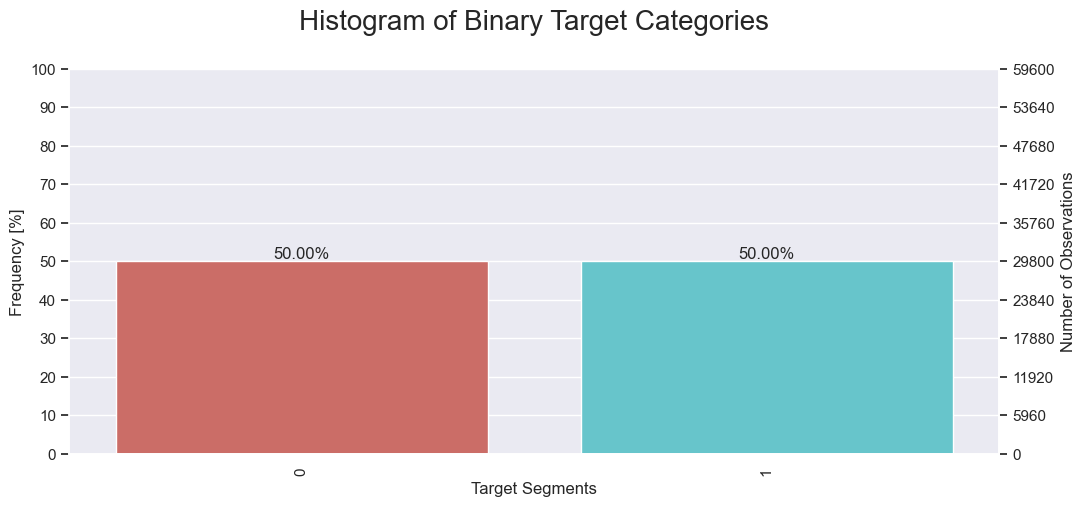

In [59]:
histogram(X_train_smote,y_train_smote)

In [60]:
print(X_train_smote.shape), print(y_train_smote.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(59600, 21)
(59600,)
(7500, 21)
(7500,)
(7500, 21)
(7500,)


(None, None)

In [61]:
df_after_smote = pd.merge(X_train_smote, y_train_smote , left_index = True, right_index=True)

In [65]:
from sklearn.metrics import classification_report, accuracy_score


def valid_accuracy_result(model):
    predictions = [round(value) for value in model.predict(X_valid)]
    accuracy = accuracy_score(y_valid, predictions)
    return accuracy
    

def test_accuracy_result(model):
    predictions = [round(value) for value in model.predict(X_test)]
    accuracy = accuracy_score(y_test, predictions)
    return accuracy
    
    
def classification_report_result(model):
    print(classification_report(y_valid, model.predict(X_valid)))

In [66]:
from sklearn.linear_model import LogisticRegression

In [87]:
logreg = LogisticRegression().fit(X_train_smote, y_train_smote)

classification_report_result(logreg)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      6334
           1       0.35      0.35      0.35      1166

    accuracy                           0.80      7500
   macro avg       0.62      0.62      0.62      7500
weighted avg       0.80      0.80      0.80      7500



In [68]:
logreg_valid = valid_accuracy_result(logreg)
print("Validation Accuracy: %.2f%%" % (logreg_valid * 100.0))

Validation Accuracy: 79.72%


In [69]:
logreg_test = test_accuracy_result(logreg)
print("Test Accuracy: %.2f%%" % (logreg_test * 100.0))

Test Accuracy: 79.57%


In [70]:
from sklearn.model_selection import GridSearchCV
logreg_tunned = LogisticRegression()
logreg_tunned_params = {"penalty": ['l2', 'elasticnet'],
                        "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                        "max_iter": [50,100,200],
                        "n_jobs" : [-1],
                        "C": [0.1,1,10]}

logreg_tunned_model = GridSearchCV(logreg_tunned, logreg_tunned_params, 
                                   scoring='roc_auc', cv=3, n_jobs=-1, verbose=2).fit(X_train_smote,y_train_smote)
print(logreg_tunned_model.best_params_)

Fitting 3 folds for each of 90 candidates, totalling 270 fits
{'C': 10, 'max_iter': 50, 'n_jobs': -1, 'penalty': 'l2', 'solver': 'liblinear'}


In [71]:
logreg_tunned = LogisticRegression(C=10, max_iter=50, n_jobs=-1, penalty='l2', solver='newton-cg').fit(X_train_smote, y_train_smote)

In [72]:
classification_report_result(logreg_tunned)

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      6334
           1       0.41      0.39      0.40      1166

    accuracy                           0.82      7500
   macro avg       0.65      0.64      0.64      7500
weighted avg       0.81      0.82      0.82      7500



In [73]:
logreg_valid_tunned = valid_accuracy_result(logreg_tunned)
print("Validation Accuracy: %.2f%%" % (logreg_valid_tunned * 100.0))

Validation Accuracy: 81.72%


In [74]:
logreg_test_tunned = test_accuracy_result(logreg_tunned)
print("Test Accuracy: %.2f%%" % (logreg_test_tunned * 100.0))

Test Accuracy: 82.47%


In [75]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier().fit(X_train_smote, y_train_smote)

classification_report_result(rfc)

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      6334
           1       0.44      0.25      0.32      1166

    accuracy                           0.83      7500
   macro avg       0.65      0.60      0.61      7500
weighted avg       0.80      0.83      0.81      7500



In [76]:
rfc_valid = valid_accuracy_result(rfc)
print("Validation Accuracy: %.2f%%" % (rfc_valid * 100.0))

Validation Accuracy: 83.29%


In [77]:
rfc_test = test_accuracy_result(rfc)
print("Test Accuracy: %.2f%%" % (rfc_test * 100.0))

Test Accuracy: 83.49%


In [78]:
from sklearn.model_selection import GridSearchCV
rfc_tunned = RandomForestClassifier()
rfc_tunned_params = {'max_depth': [2,10,20],
                     'n_estimators': [100,200],
                     'max_features': [4,10,30],
                     'min_samples_leaf': [2,10]}

rfc_tunned_model = GridSearchCV(rfc_tunned, rfc_tunned_params, 
                                scoring='roc_auc', cv=3, n_jobs=-1, verbose=2).fit(X_train_smote,y_train_smote)
print(rfc_tunned_model.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
{'max_depth': 20, 'max_features': 4, 'min_samples_leaf': 2, 'n_estimators': 200}


In [79]:
rfc_tunned = RandomForestClassifier(max_depth=20, max_features=4, min_samples_leaf=2, n_estimators=200).fit(X_train_smote, y_train_smote)

In [80]:
classification_report_result(rfc_tunned)

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6334
           1       0.44      0.31      0.36      1166

    accuracy                           0.83      7500
   macro avg       0.66      0.62      0.63      7500
weighted avg       0.81      0.83      0.82      7500



In [81]:
rfc_valid_tunned = valid_accuracy_result(rfc_tunned)
print("Validation Accuracy: %.2f%%" % (rfc_valid_tunned * 100.0))

Validation Accuracy: 83.01%


In [82]:
rfc_test_tunned = test_accuracy_result(rfc_tunned)
print("Test Accuracy: %.2f%%" % (rfc_test_tunned * 100.0))

Test Accuracy: 83.15%


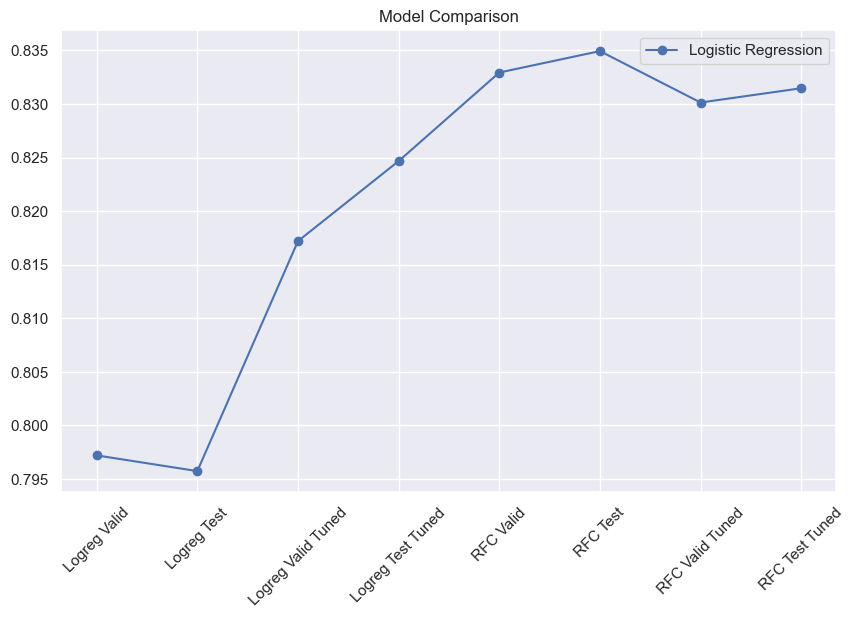

In [84]:
plt.figure(figsize=(10, 6))
plt.plot([logreg_valid, logreg_test, logreg_valid_tunned, logreg_test_tunned,
          rfc_valid, rfc_test, rfc_valid_tunned, rfc_test_tunned], marker="o")
plt.legend(["Logistic Regression", "Logistic Regression Tuned", "Random Forest", "Random Forest Tuned"])
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7], ["Logreg Valid", "Logreg Test", "Logreg Valid Tuned", "Logreg Test Tuned",
                                      "RFC Valid", "RFC Test", "RFC Valid Tuned", "RFC Test Tuned"], rotation=45)
plt.title("Model Comparison")
plt.show()
